In [1]:
import os
# setting the enviornment variable before importing KMeans resolves memory leak warning
os.environ["OMP_NUM_THREADS"] = '3'
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# read data
file = "Resources/myopia.csv"
df = pd.DataFrame(pd.read_csv(file))
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# search for any obvious discrepencies or data that may need to be scaled
df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [4]:
# check for irregular data types 
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [5]:
# look for instances of missing or duplicate values
print(f"{df.isnull().values.any()}")
print(f"{df.duplicated().any()}")

False
False


In [6]:
# copy dataframe without the target variable
df2 = df.drop(columns="MYOPIC", index=1)

In [7]:
df2.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [8]:
# scale non-boolean variables 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR']])

data_scaled

array([[-4.20619697e-01, -1.36341798e+00, -8.92438430e-01, ...,
        -6.72836478e-01,  1.83374245e-01,  4.96791845e-01],
       [-4.20619697e-01,  6.03443904e-01, -1.02472735e-02, ...,
        -6.72836478e-01,  1.83374245e-01, -7.51510206e-01],
       [-4.20619697e-01, -4.41501453e-01, -4.36637940e-01, ...,
        -6.72836478e-01, -8.65855205e-01,  6.84037153e-01],
       ...,
       [-4.20619697e-01,  1.64998692e+00,  6.51396792e-01, ...,
        -6.72836478e-01, -8.65855205e-01, -1.37566123e+00],
       [-4.20619697e-01, -2.17812788e-01, -8.48327886e-01, ...,
        -6.72836478e-01,  1.05773212e+00, -1.89774283e-01],
       [-4.20619697e-01,  1.08242298e-03, -3.48419660e-01, ...,
        -6.72836478e-01,  1.83374245e-01, -7.51510206e-01]])

In [9]:
df2.shape

(617, 14)

In [10]:
data_scaled.shape

(617, 12)

In [11]:
# read scaled data into a dataframe and re-introduce boolean columns ('MOMMY' and 'DADMY')
scaled_df = pd.DataFrame(data_scaled,columns=df2.columns[:12])
scaled_df['MOMMY'] = df2['MOMMY'].values
scaled_df['DADMY'] = df2['DADMY'].values
# scaled_df.shape
scaled_df.isnull().any()

AGE          False
SPHEQ        False
AL           False
ACD          False
LT           False
VCD          False
SPORTHR      False
READHR       False
COMPHR       False
STUDYHR      False
TVHR         False
DIOPTERHR    False
MOMMY        False
DADMY        False
dtype: bool

In [12]:
scaled_df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420620,-1.363418,-0.892438,0.484373,-0.282998,-1.019192,4.149040,1.695742,-0.689412,-0.672836,0.183374,0.496792,1,1
1,-0.420620,0.603444,-0.010247,-0.505468,-0.179372,0.215425,0.255473,-0.913417,-0.035001,-0.672836,0.183374,-0.751510,0,0
2,-0.420620,-0.441501,-0.436638,1.231095,0.455336,-0.974024,0.757869,2.674177,-0.689412,-0.672836,-0.865855,0.684037,0,1
3,-1.823443,-0.166684,1.166009,0.423594,-0.567968,1.179027,0.255473,-0.913417,-0.689412,-0.672836,-0.865855,-1.375661,1,0
4,-0.420620,1.506187,-0.524859,-1.538722,0.092646,-0.025477,-0.246923,1.043452,-0.035001,-0.221597,1.757218,1.120943,0,1


In [13]:
# perform PCA while preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(scaled_df)

data_pca.shape

(617, 9)

In [32]:
# read transformed data (PCA) to dataframe
pca_df = pd.DataFrame(
    data=data_pca,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9"]
)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.507228,1.234875,0.753099,-3.419238,-1.351355,-2.079206,-1.808060,0.143975,-1.352626
1,-0.905351,-0.821655,0.733293,-0.155580,0.902184,-0.045803,0.190759,0.074394,-0.172532
2,0.116168,1.142202,-0.980868,-1.225413,-2.090090,-1.899965,-0.294621,-0.543832,0.688067
3,-0.404502,-2.791267,0.554836,-0.457967,-0.280833,-0.871708,0.709709,0.532183,0.113444
4,-0.337258,1.947846,1.161769,-0.262795,0.994827,-0.014267,1.422405,-1.457581,0.264947


In [33]:
# further reduce dimentionality using t-sne
tsne = TSNE(learning_rate=100)
data_tsne = tsne.fit_transform(data_pca)

c:\Users\Ryan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [58]:
# view shape of transformed dataset
data_tsne.shape

(617, 2)

In [34]:
# read tsne data to a dataframe for easier visualization
tsne_df = pd.DataFrame(
    data=data_tsne,
    columns= ["x", "y"]
)
tsne_df.head()

,x,y
0,23.025740,-8.930168
1,0.571964,-0.460423
2,-10.425541,14.302752
3,0.442034,-14.707854
4,-5.895039,12.327023


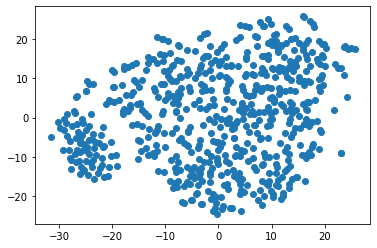

In [35]:
plt.scatter(tsne_df["x"], tsne_df["y"])
plt.show()

In [60]:
# determine inertia values for each k (number of clusters) between 1 and 10
inertia = []
k = list(np.arange(1,11,1))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_df)
    inertia.append(km.inertia_)


inert_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(inert_data)
df_elbow.head()

,k,inertia
0,1,206022.992158
1,2,118399.771522
2,3,67852.721209
3,4,49218.848142
4,5,38428.239915


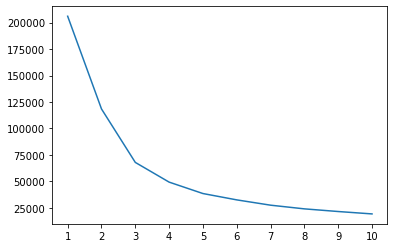

In [61]:
# plot inertia vs. k and determine the optimal value for k by observing the "elbow"
plt.plot(df_elbow['k'],df_elbow['inertia'])
plt.xticks(range(1,11))
plt.show()

In [40]:
def get_clusters(k, data):
    """identifies clusters using K-means algorithm and returns a dataframe containing their class values 

    Args:
        k (int): optimal number of clusters
        data (df): reduced dataframe with transformed features 
    """
    model = KMeans(n_clusters=k, random_state=5)
    # fit the data and predict class values 
    model.fit(data)
    pred = model.predict(data)
    
    # insert "class" column containing predicted label values to the input dataframe
    data["class"] = model.labels_
    
    return data
    

In [55]:
clusters = get_clusters(3, tsne_df)
clusters.head()

,x,y,class
0,23.025740,-8.930168,0
1,0.571964,-0.460423,0
2,-10.425541,14.302752,1
3,0.442034,-14.707854,0
4,-5.895039,12.327023,2


In [64]:
def tsne_clusters(df):
    """returns a 2-D matplotlib scatter plot with the transformed features columns as the axis and class colors to visualize clusters

    Args:
        df (dataframe): dataframe returned by get_clusters
    """
    plt.scatter(df["x"], df["y"], c=df["class"])
    plt.xlabel('tsne 1')
    plt.ylabel('tsne 2')
    
    plt.show()


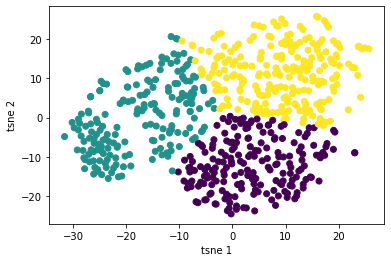

In [65]:
tsne_clusters(clusters)